In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Uniendo datasets
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
df_titanic = pd.concat([titanic_train, titanic_test], ignore_index=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Limpieza de datos
df_titanic.drop(columns=['Name', 'PassengerId', 'Cabin','Ticket'], axis=1, inplace=True)

# Quitando nulos
df_titanic.dropna(inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    float64
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 50.1+ KB


In [5]:
# Convirtiendo atributos (strings) a enteros
df_titanic =pd.get_dummies(df_titanic,dtype=int)
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1.0,1,38.0,1,0,71.2833,1,0,1,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,0,0,1


In [6]:
# Ver la correlación absoluta con "Survived", quitando el propio survived que es 1.00
df_titanic.corr(numeric_only=True)['Survived'].abs().sort_values(ascending=False)[1:]

Sex_male      0.536762
Sex_female    0.536762
Pclass        0.356462
Fare          0.266100
Embarked_C    0.195673
Embarked_S    0.159015
Parch         0.095265
Age           0.082446
Embarked_Q    0.048966
SibSp         0.015523
Name: Survived, dtype: float64

In [10]:
# Preparar los datos para el modelo
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived'].to_frame()

In [11]:
# Escalando los datos, para que el modelo funcione mejor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Entrenar el modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [15]:
# Vamos ver el resultado del árbol de decisión
y_pred = tree_clf.predict(X_test)
print("Accuracy del árbol de decisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación del árbol de decisión:\n", classification_report(y_test, y_pred))
print("Matriz de confusión del árbol de decisión:\n", confusion_matrix(y_test, y_pred))

Accuracy del árbol de decisión: 0.7762237762237763
Reporte de clasificación del árbol de decisión:
               precision    recall  f1-score   support

         0.0       0.80      0.84      0.82        85
         1.0       0.74      0.69      0.71        58

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.77       143
weighted avg       0.77      0.78      0.77       143

Matriz de confusión del árbol de decisión:
 [[71 14]
 [18 40]]


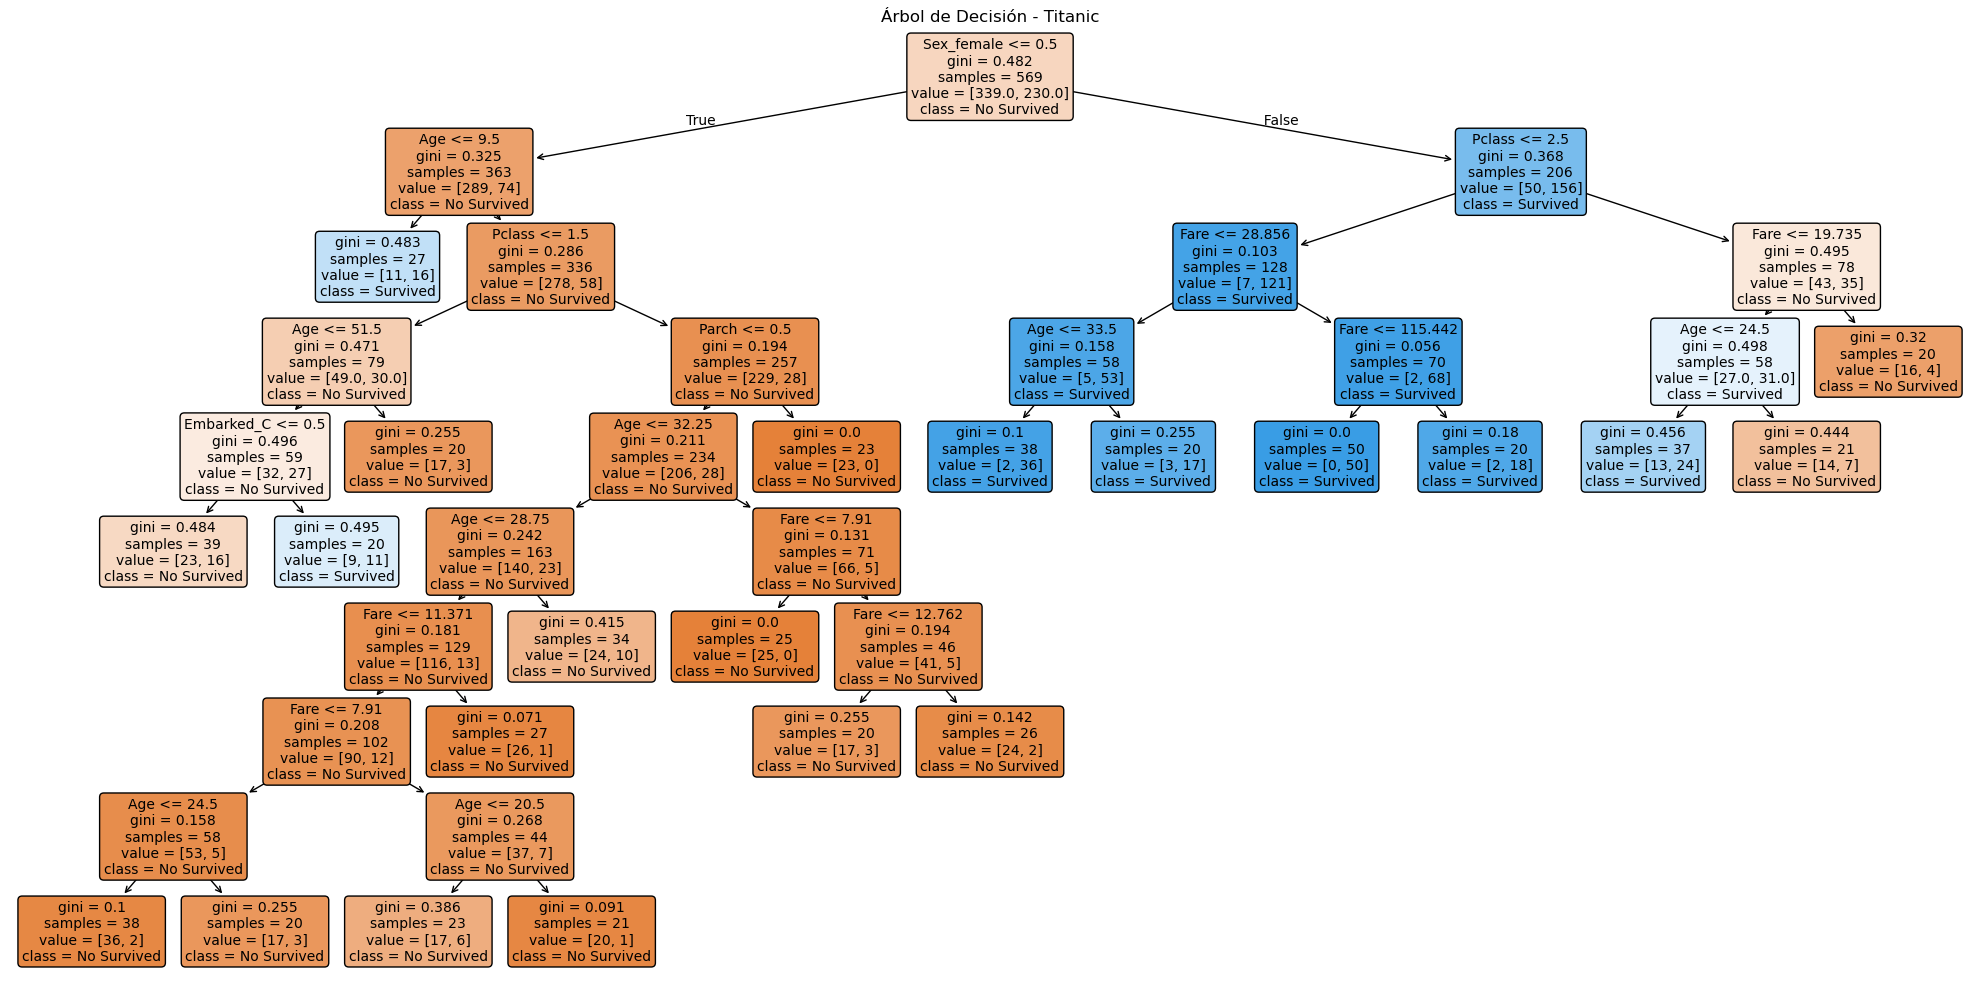

In [18]:
# Ahora vamos a visualizar el arbol de decision
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=['No Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Titanic")
plt.tight_layout()
plt.savefig('tree.png', dpi=300, bbox_inches='tight')
plt.show()